In [1]:
import pandas as pd
import re
from textblob import TextBlob
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.layers.embeddings import Embedding
from keras.layers import GlobalMaxPooling1D
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.recurrent import LSTM
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
data=pd.read_csv("ReviewSentiments.csv")
print(data.head())

                                              Review     Label
0  As much as I love the story of David Copperfie...  Negative
1  I was lucky enough to see a test screening of ...  Positive
2  I greatly enjoyed Margaret Atwood's novel 'The...  Negative
3  Would it surprise you that my ears and eyes al...  Negative
4  This is a poor caricature of "Lonesome Dove" -...  Negative


In [3]:
#Describing the dataset used
data.describe()

,Review,Label
count,62500,62500
unique,49582,2
top,I see that C. Thomas Howell has appeared in ma...,Negative
freq,6,37500


In [4]:
#Datatype of Dataset
data.dtypes

Review    object
Label     object
dtype: object

In [5]:
#Total columns and Rows in dataset
data.shape

(62500, 2)

In [6]:
#Uncleaned-data
data['Review'][2]

"I greatly enjoyed Margaret Atwood's novel 'The Robber Bride', and I was thrilled to see there was a movie version. A woman frames a cop boyfriend for her own murder, and his buddy, an ex-cop journalist, tries to clear his name by checking up on the dead woman's crazy female friends. It's fortunate that the movie script fixes Ms. Atwood's clumsy plotting by focusing on the story of these two men, victims of scheming women...<br /><br />Heh. Okay, you got me. If these guys are mentioned in the book, and I'm pretty sure they're entirely made up for the movie, I'll eat the dust cover of my hardback copy. Apparently, the three main female characters of the novel aren't enough to carry the movie. Zenia's manipulations aren't interesting unless we see them happen to a man, and a man's life is screwed up. Roz, Charis, and Toni tell their stories -- to a man. Because it's not important if a man doesn't hear them.<br /><br />I liked the characters in the book. It hurts to see them pushed off to

In [7]:
#Dropping Duplicate data
data.drop_duplicates(keep="first",inplace=True)
data.describe()


,Review,Label
count,49582,49582
unique,49582,2
top,After seeing a heavily censored version of thi...,Positive
freq,1,24884


In [8]:
#Cleaning Data
Cleaned_reviews=[]
for x in (data['Review']):
    #removing Tags
    text=re.sub(r'<.*?>'," ",x)
    #Removing special characters
    text=re.sub(r"[^a-zA-Z0-9]+"," ", text)
    # removing digits
    text=re.sub("\d", " ", text)
    # removing puntutation
    text=re.sub(r'[^\w\s]', ' ', text)
    #removing single spaces
    text=re.sub(r'\s+', ' ', text)
    #Removing single characters
    text=re.sub(r"\s+[a-zA-Z]\s+", ' ', text)


    if text!="":
        Cleaned_reviews.append(text)
    else:
        pass

In [9]:
#Data got cleaned
#Cleaned_reviews= [str(i).lower() for i in Cleaned_reviews] 
Cleaned_reviews[2]

'I greatly enjoyed Margaret Atwood novel The Robber Bride and was thrilled to see there was movie version woman frames cop boyfriend for her own murder and his buddy an ex cop journalist tries to clear his name by checking up on the dead woman crazy female friends It fortunate that the movie script fixes Ms Atwood clumsy plotting by focusing on the story of these two men victims of scheming women Heh Okay you got me If these guys are mentioned in the book and m pretty sure they re entirely made up for the movie ll eat the dust cover of my hardback copy Apparently the three main female characters of the novel aren enough to carry the movie Zenia manipulations aren interesting unless we see them happen to man and man life is screwed up Roz Charis and Toni tell their stories to man Because it not important if man doesn hear them liked the characters in the book It hurts to see them pushed off to the side for man story normally do not look for feminist angles on media and tried to enjoy th

In [10]:
#Creating new DataFrame with new column textblob label
label_list=[]
label=["Review","Label"]
for c in (data['Label']):
    label_list.append(c)
    
final_data=list(zip(Cleaned_reviews,label_list))
New_df=pd.DataFrame(final_data,columns=label)
New_df.to_csv("FinalMovieReviews.csv",index=False)
        

In [11]:
final_data=pd.read_csv("FinalMovieReviews.csv")
final_data

,Review,Label
0,As much as love the story of David Copperfield...,Negative
1,I was lucky enough to see test screening of El...,Positive
2,I greatly enjoyed Margaret Atwood novel The Ro...,Negative
3,Would it surprise you that my ears and eyes al...,Negative
4,This is poor caricature of Lonesome Dove and L...,Negative
...,...,...
49577,I couldn believe my eyes when watched Nurember...,Negative
49578,The feature length CGI movie has just been rel...,Positive
49579,This is so incredibly bad Poor actors You can ...,Negative
49580,Though saw this movie years ago its impact has...,Positive


In [12]:
#Converting labels into "0" and "1" 
label_encoding=[]
for z in data['Label']:
    if z=="Positive":
        label_encoding.append(1)
    else:
        label_encoding.append(0)
y=np.array(label_encoding)





In [13]:
y

array([0, 1, 0, ..., 0, 1, 1])

In [14]:
# english_stop_words = stopwords.words('english')
# final_data['Review']=final_data['Review'].str.lower().str.split()
# final_data['Review']=final_data['Review'].apply(lambda x:' '.join([item for item in x if item not in english_stop_words]))

# lmtzr=WordNetLemmatizer()
# final_data['Review']=final_data['Review'].apply(lambda x:' '.join([lmtzr.lemmatize(word,'v') for word in x.split()]))




In [15]:
X=[]
for t in final_data['Review']:
    X.append(t)


In [16]:
X[10]

'Dirty Sanchez is the more extreme British version of Jackass in which the four boys Pritchard Dainton Joycey and Pancho go to great lengths to hurt and humiliate each other The reason this show is better than Jackass is because most of the stunts are not planned which makes the reaction much more funny There are series of the show the first follows them around and takes long look at their lives eg there an episode on their love lives jobs etc The second series sends the boys to try out different occupations The third follows their European tour It seems that the boys get more and more daring as the show progresses through the series In my opinion the third series is the best but trust me when say if you have week stomach DO NOT WATCH as you are lightly to see fair amount of blood and puke in every episode '

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
#Tokenizer
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
# vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english', max_features= 10000,strip_accents='unicode', norm='l2')

X_train = tokenizer.texts_to_sequences(X_train)

# tfidf = TfidfVectorizer(binary=True)
# X_train=tfidf.fit_transform(X_train)

X_test = tokenizer.texts_to_sequences(X_test)


In [19]:
len(X_train)

37186

In [20]:
len(X_test)

12396

In [21]:
#pad sequence
vocab_size = len(tokenizer.word_index) + 1
#vocab_size

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
#X_train
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [22]:
#Glove
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [23]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [31]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.026752  ,  0.57730001,  0.211     , ...,  0.77636999,
         0.43457001,  0.33961001],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.076351  ,  0.50613999,  0.25558999, ...,  0.70826   ,
        -0.33695   ,  0.25573   ]])

In [42]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [43]:
(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 100)          8825700   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 496, 128)          64128     
_________________________________________________________________
dropout_3 (Dropout)          (None, 496, 128)          0         
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 8,889,957
Trainable params: 64,257
Non-trainable params: 8,825,700
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, batch_size=128, epochs=8, verbose=1, validation_split=0.25)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 27889 samples, validate on 9297 samples
Epoch 1/8
27889/27889 [==============================] - 78s 3ms/step - loss: 0.5256 - acc: 0.7368 - val_loss: 0.4383 - val_acc: 0.8347
Epoch 2/8
27889/27889 [==============================] - 82s 3ms/step - loss: 0.3566 - acc: 0.8443 - val_loss: 0.3755 - val_acc: 0.8573
Epoch 3/8
27889/27889 [==============================] - 81s 3ms/step - loss: 0.3117 - acc: 0.8693 - val_loss: 0.3491 - val_acc: 0.8682
Epoch 4/8
27889/27889 [==============================] - 82s 3ms/step - loss: 0.2862 - acc: 0.8820 - val_loss: 0.3349 - val_acc: 0.8753
Epoch 5/8
27889/27889 [==============================] - 84s 3ms/step - loss: 0.2606 - acc: 0.8936 - val_loss: 0.3258 - val_acc: 0.8748
Epoch 6/8
27889/27889 [==============================] - 82s 3ms/step - loss: 0.2441 - acc: 0.9015 - val_loss: 0.3193 - val_acc: 0.8778
Epoch 7/8
27889/27889 [==============================] - 81s 3ms/step - loss: 0.2309 - acc: 0.9076 - val_loss: 0.3259 - val_acc: 0.8690

In [45]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3047909043169129
Test Accuracy: 0.8834301233291626


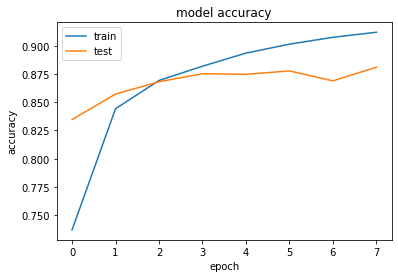

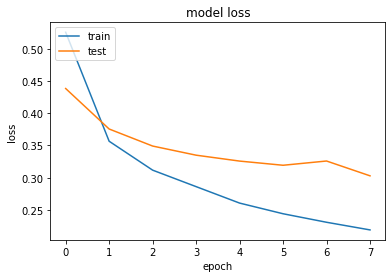

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [47]:
predictions = model.predict(X_test)
predictions

array([[0.9873042 ],
       [0.9728291 ],
       [0.7703489 ],
       ...,
       [0.9136884 ],
       [0.41616827],
       [0.49545264]], dtype=float32)

In [48]:
y_pred = (predictions > 0.5)

In [49]:
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [50]:
confusion_matrix(y_test, y_pred)

array([[5512,  682],
       [ 763, 5439]], dtype=int64)

In [51]:
print(("Accuracy is  {:.2f} %: ".format(accuracy_score(y_test, y_pred) * 100)))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy is  88.34 %: 

F1 Score: 88.27

COnfusion Matrix:
 [[5512  682]
 [ 763 5439]]


In [52]:
print("Classification Report : \n",classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      6194
           1       0.89      0.88      0.88      6202

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396



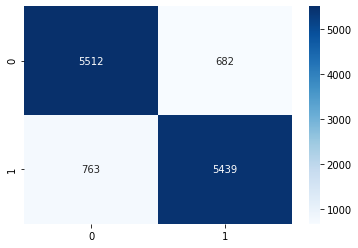

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')

In [54]:
roc_auc_score(y_test, y_pred)

0.8834343072849207

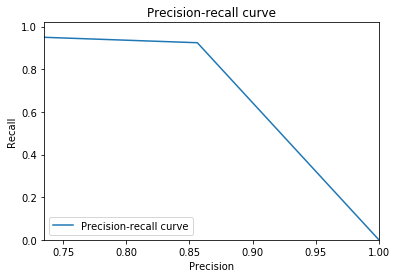

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.xlim([0.735, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower left")

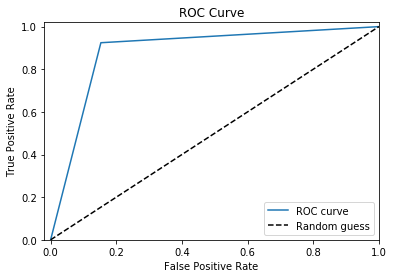

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")